In [90]:
# import basic libraries
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from wordcloud import WordCloud
import seaborn as sns


In [91]:
# load the dataset
df=pd.read_csv('malicious.csv')
df.head(10)

,url,type
0,br-icloud.com.br,phishing
1,mp3raid.com/music/krizz_kaliko.html,benign
2,bopsecrets.org/rexroth/cr/1.htm,benign
3,http://www.garage-pirenne.be/index.php?option=...,defacement
4,http://adventure-nicaragua.net/index.php?optio...,defacement
5,http://buzzfil.net/m/show-art/ils-etaient-loin...,benign
6,espn.go.com/nba/player/_/id/3457/brandon-rush,benign
7,yourbittorrent.com/?q=anthony-hamilton-soulife,benign
8,http://www.pashminaonline.com/pure-pashminas,defacement
9,allmusic.com/album/crazy-from-the-heat-r16990,benign


In [92]:
# Dataset info
print("Dimensions: ", df.shape)
print("Columns info: ",df.columns)
print("\n")
print(df.info())
print(df.describe())

Dimensions:  (651191, 2)
Columns info:  Index(['url', 'type'], dtype='object')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 651191 entries, 0 to 651190
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   url     651191 non-null  object
 1   type    651191 non-null  object
dtypes: object(2)
memory usage: 9.9+ MB
None
                                                      url    type
count                                              651191  651191
unique                                             641119       4
top     http://style.org.hc360.com/css/detail/mysite/s...  benign
freq                                                  180  428103


In [93]:
# Check for dupliates values and remove it
num_duplicates = df.duplicated().sum()
print("Number of duplicates: ",num_duplicates)
df_cleaned = df.drop_duplicates()
print(df_cleaned)

Number of duplicates:  10066
                                                      url        type
0                                        br-icloud.com.br    phishing
1                     mp3raid.com/music/krizz_kaliko.html      benign
2                         bopsecrets.org/rexroth/cr/1.htm      benign
3       http://www.garage-pirenne.be/index.php?option=...  defacement
4       http://adventure-nicaragua.net/index.php?optio...  defacement
...                                                   ...         ...
651186            xbox360.ign.com/objects/850/850402.html    phishing
651187       games.teamxbox.com/xbox-360/1860/Dead-Space/    phishing
651188         www.gamespot.com/xbox360/action/deadspace/    phishing
651189      en.wikipedia.org/wiki/Dead_Space_(video_game)    phishing
651190          www.angelfire.com/goth/devilmaycrytonite/    phishing

[641125 rows x 2 columns]


In [94]:
# check for null values
null_counts=df_cleaned.isnull().sum()
print(null_counts)

url     0
type    0
dtype: int64


In [95]:
# Sample one random row from each group defined by the 'type' column
df_cleaned.groupby('type').apply(lambda x: x.sample(1)).reset_index(drop=True)

,url,type
0,facebook.com/thekingkhanbbqshow,benign
1,http://stock.perm.ru/index.php?limitstart=2,defacement
2,http://165.22.21.85/m68k,malware
3,reflesjjes.site,phishing


type
benign        428080
defacement     95308
phishing       94092
malware        23645
Name: count, dtype: int64


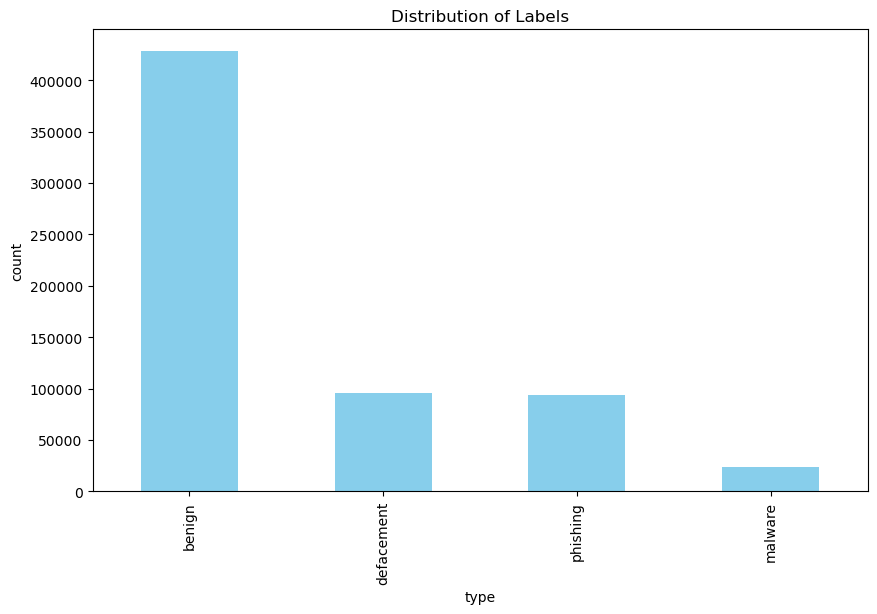

In [96]:
# Examining each label count
label_counts=df_cleaned['type'].value_counts()
plt.figure(figsize=(10,6))
print(label_counts)
label_counts.plot(kind='bar',color='skyblue')
plt.title("Distribution of Labels")
plt.xlabel('type')
plt.ylabel('count')
plt.show()


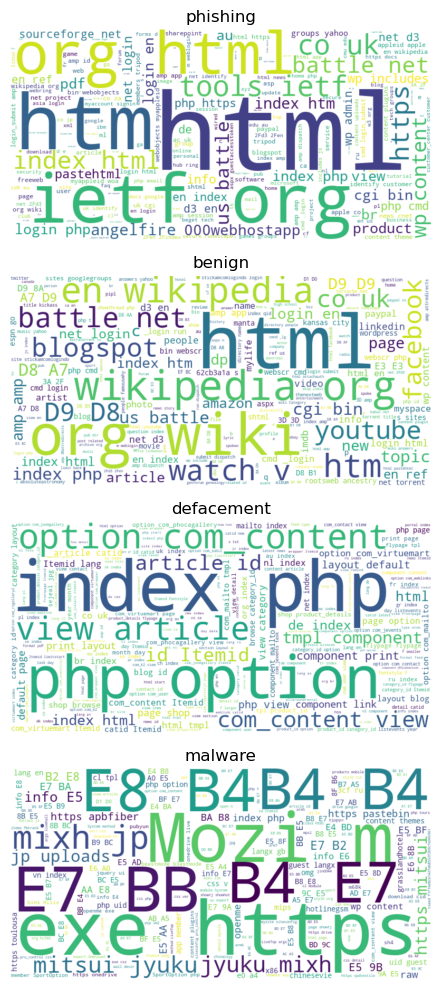

In [97]:
# Display of Word Clouds for Each Label Separately ,
# This info is highly used when we use bag of words for feature extraction, but here we hve extracted on our own,
# This info only for general understanding.
df['url'] = df['url'].astype(str)
df['label'] = df['type'].astype(str)
labels = df['label'].unique()

plt.figure(figsize=(15, 10))  

for i, label in enumerate(labels):

    filtered_df = df[df['label'] == label]
    text = ' '.join(filtered_df['url'])
    wordcloud = WordCloud(
        background_color='white',  
        width=800,                 
        height=400,                
        max_words=200,             
        colormap='viridis'     
    ).generate(text) 

    plt.subplot(len(labels), 1, i + 1)  
    plt.imshow(wordcloud, interpolation='bilinear')  
    plt.title(label) 
    plt.axis('off')  

plt.tight_layout() 
plt.show() 

In [98]:
# Encode label to number value

from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()
le.fit(df_cleaned["type"])
df_cleaned["label"] = le.transform(df_cleaned["type"])
df_cleaned.head()

,url,type,label
0,br-icloud.com.br,phishing,3
1,mp3raid.com/music/krizz_kaliko.html,benign,0
2,bopsecrets.org/rexroth/cr/1.htm,benign,0
3,http://www.garage-pirenne.be/index.php?option=...,defacement,1
4,http://adventure-nicaragua.net/index.php?optio...,defacement,1


In [99]:
# Now from the raw url data we extract Features

# Feature 01-URL length
df_cleaned['url_len']=[len(url) for url in df_cleaned.url]
df_cleaned.head()

,url,type,label,url_len
0,br-icloud.com.br,phishing,3,16
1,mp3raid.com/music/krizz_kaliko.html,benign,0,35
2,bopsecrets.org/rexroth/cr/1.htm,benign,0,31
3,http://www.garage-pirenne.be/index.php?option=...,defacement,1,88
4,http://adventure-nicaragua.net/index.php?optio...,defacement,1,235


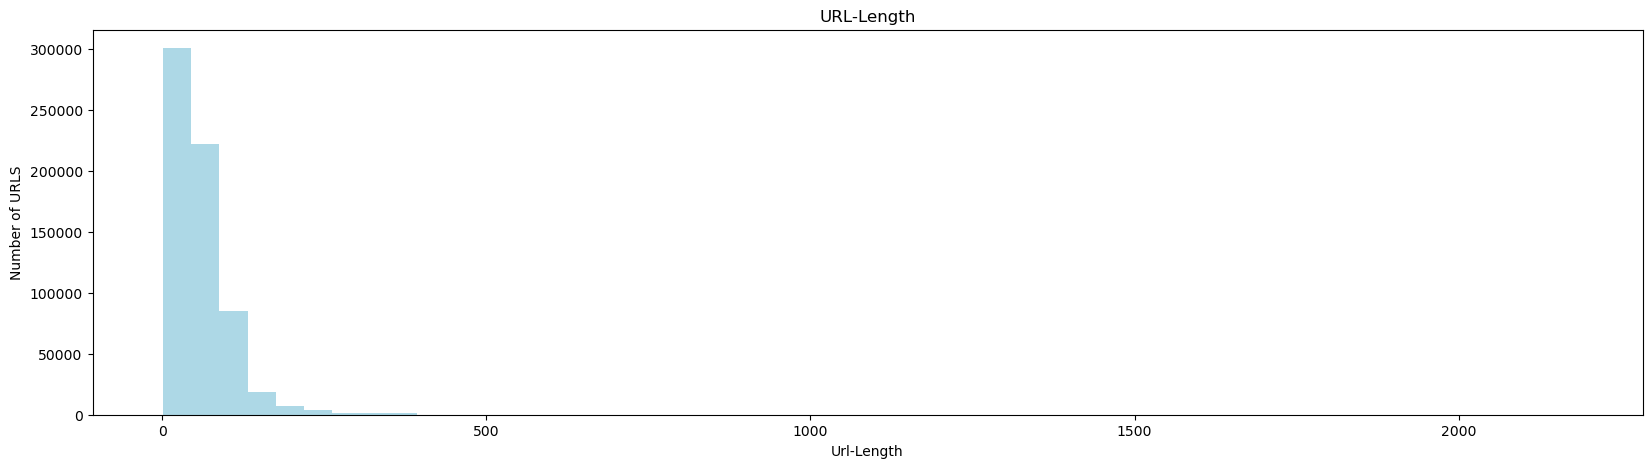

In [100]:
plt.figure(figsize=(20,5))
plt.hist(df_cleaned['url_len'],bins=50,color='LightBlue')
plt.title("URL-Length")
plt.xlabel("Url-Length")
plt.ylabel("Number of URLS")
plt.show()

In [101]:
# Feature 02-Check ip in url

import re
def having_ip_address(url):
    match = re.search(
        '(([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.'
        '([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\/)|'  # IPv4
        '((0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\/)' # IPv4 in hexadecimal
        '(?:[a-fA-F0-9]{1,4}:){7}[a-fA-F0-9]{1,4}', url)  # Ipv6
    if match:
        return 1
    else:
        return 0
df_cleaned['use_of_ip'] = df_cleaned['url'].apply(lambda i: having_ip_address(i))
count_ip_in_url=0
ip_present=df_cleaned['use_of_ip']
for x in ip_present:
    if x==1:
        count_ip_in_url+=1
print("Number of urls have ip: ",count_ip_in_url)


Number of urls have ip:  7292


In [102]:
df_cleaned.head()

,url,type,label,url_len,use_of_ip
0,br-icloud.com.br,phishing,3,16,0
1,mp3raid.com/music/krizz_kaliko.html,benign,0,35,0
2,bopsecrets.org/rexroth/cr/1.htm,benign,0,31,0
3,http://www.garage-pirenne.be/index.php?option=...,defacement,1,88,0
4,http://adventure-nicaragua.net/index.php?optio...,defacement,1,235,0


In [103]:
# Feature 03-Check weather it is abnormal or not

from urllib.parse import urlparse

def abnormal_url(url):
    hostname = urlparse(url).hostname
    hostname = str(hostname)
    match = re.search(hostname, url)
    if match:
        return 1
    else:
        return 0

df_cleaned['abnormal_url'] = df_cleaned['url'].apply(lambda i: abnormal_url(i))


In [104]:
df_cleaned.head()

,url,type,label,url_len,use_of_ip,abnormal_url
0,br-icloud.com.br,phishing,3,16,0,0
1,mp3raid.com/music/krizz_kaliko.html,benign,0,35,0,0
2,bopsecrets.org/rexroth/cr/1.htm,benign,0,31,0,0
3,http://www.garage-pirenne.be/index.php?option=...,defacement,1,88,0,1
4,http://adventure-nicaragua.net/index.php?optio...,defacement,1,235,0,1


In [105]:
# Feature 04-Count number of (.)
# The URLs of phishing or malware websites frequently contain more than two subdomains

df_cleaned['count.'] = df_cleaned['url'].apply(lambda i: i.count('.'))
df_cleaned.head()

,url,type,label,url_len,use_of_ip,abnormal_url,count.
0,br-icloud.com.br,phishing,3,16,0,0,2
1,mp3raid.com/music/krizz_kaliko.html,benign,0,35,0,0,2
2,bopsecrets.org/rexroth/cr/1.htm,benign,0,31,0,0,2
3,http://www.garage-pirenne.be/index.php?option=...,defacement,1,88,0,1,3
4,http://adventure-nicaragua.net/index.php?optio...,defacement,1,235,0,1,2


In [106]:
# Feature 05 -Count of (www)

# The majority of secure websites typically only contain one www in their URLs. 
#If the URL has more than one www, this feature aids in the detection of fraudulent websites.
df_cleaned['count-www'] = df_cleaned['url'].apply(lambda i: i.count('www'))
df_cleaned.head()

,url,type,label,url_len,use_of_ip,abnormal_url,count.,count-www
0,br-icloud.com.br,phishing,3,16,0,0,2,0
1,mp3raid.com/music/krizz_kaliko.html,benign,0,35,0,0,2,0
2,bopsecrets.org/rexroth/cr/1.htm,benign,0,31,0,0,2,0
3,http://www.garage-pirenne.be/index.php?option=...,defacement,1,88,0,1,3,1
4,http://adventure-nicaragua.net/index.php?optio...,defacement,1,235,0,1,2,0


In [107]:
# Feature 06- Count '@'
# If the URL contains the "@" sign, everything before it is ignored
df_cleaned['count@'] = df_cleaned['url'].apply(lambda i: i.count('@'))
df_cleaned.head()

,url,type,label,url_len,use_of_ip,abnormal_url,count.,count-www,count@
0,br-icloud.com.br,phishing,3,16,0,0,2,0,0
1,mp3raid.com/music/krizz_kaliko.html,benign,0,35,0,0,2,0,0
2,bopsecrets.org/rexroth/cr/1.htm,benign,0,31,0,0,2,0,0
3,http://www.garage-pirenne.be/index.php?option=...,defacement,1,88,0,1,3,1,0
4,http://adventure-nicaragua.net/index.php?optio...,defacement,1,235,0,1,2,0,0


In [108]:
# Features 07- Count depth of URL
# Websites that have several directories in their URLs are typically suspect

def no_of_dir(url):
    urldir=urlparse(url).path
    return urldir.count('/')
df_cleaned['count_dir']=df_cleaned['url'].apply(lambda i: no_of_dir(i))
df_cleaned.head()

,url,type,label,url_len,use_of_ip,abnormal_url,count.,count-www,count@,count_dir
0,br-icloud.com.br,phishing,3,16,0,0,2,0,0,0
1,mp3raid.com/music/krizz_kaliko.html,benign,0,35,0,0,2,0,0,2
2,bopsecrets.org/rexroth/cr/1.htm,benign,0,31,0,0,2,0,0,3
3,http://www.garage-pirenne.be/index.php?option=...,defacement,1,88,0,1,3,1,0,1
4,http://adventure-nicaragua.net/index.php?optio...,defacement,1,235,0,1,2,0,0,1


In [109]:
# Features -08 Suspicious url
import re

def suspicious_words(url):
     match = re.search('PayPal|login|signin|bank|account|update|free|lucky|service|bonus|ebayisapi|webscr',url)
     if match==1:
        return 1
     return 0
df_cleaned['sus_url'] = df_cleaned['url'].apply(lambda i: suspicious_words(i))
df_cleaned.head()

,url,type,label,url_len,use_of_ip,abnormal_url,count.,count-www,count@,count_dir,sus_url
0,br-icloud.com.br,phishing,3,16,0,0,2,0,0,0,0
1,mp3raid.com/music/krizz_kaliko.html,benign,0,35,0,0,2,0,0,2,0
2,bopsecrets.org/rexroth/cr/1.htm,benign,0,31,0,0,2,0,0,3,0
3,http://www.garage-pirenne.be/index.php?option=...,defacement,1,88,0,1,3,1,0,1,0
4,http://adventure-nicaragua.net/index.php?optio...,defacement,1,235,0,1,2,0,0,1,0


In [110]:
# Features - 09 Count shortend URLS
# Malicious urls shorten their orginal urls and make them not clear for normal users.
def shortening_service(url):
    match=re.search('bit\.ly|goo\.gl|shorte\.st|go2l\.ink|x\.co|ow\.ly|t\.co|tinyurl|tr\.im|is\.gd|cli\.gs|'
                      'yfrog\.com|migre\.me|ff\.im|tiny\.cc|url4\.eu|twit\.ac|su\.pr|twurl\.nl|snipurl\.com|'
                      'short\.to|BudURL\.com|ping\.fm|post\.ly|Just\.as|bkite\.com|snipr\.com|fic\.kr|loopt\.us|'
                      'doiop\.com|short\.ie|kl\.am|wp\.me|rubyurl\.com|om\.ly|to\.ly|bit\.do|t\.co|lnkd\.in|'
                      'db\.tt|qr\.ae|adf\.ly|goo\.gl|bitly\.com|cur\.lv|tinyurl\.com|ow\.ly|bit\.ly|ity\.im|'
                      'q\.gs|is\.gd|po\.st|bc\.vc|twitthis\.com|u\.to|j\.mp|buzurl\.com|cutt\.us|u\.bb|yourls\.org|'
                      'x\.co|prettylinkpro\.com|scrnch\.me|filoops\.info|vzturl\.com|qr\.net|1url\.com|tweez\.me|v\.gd|'
                      'tr\.im|link\.zip\.net',url)
    if match==1:
        return 1
    return 0
df_cleaned['short_url'] = df_cleaned['url'].apply(lambda i: shortening_service(i))
df_cleaned.head()

,url,type,label,url_len,use_of_ip,abnormal_url,count.,count-www,count@,count_dir,sus_url,short_url
0,br-icloud.com.br,phishing,3,16,0,0,2,0,0,0,0,0
1,mp3raid.com/music/krizz_kaliko.html,benign,0,35,0,0,2,0,0,2,0,0
2,bopsecrets.org/rexroth/cr/1.htm,benign,0,31,0,0,2,0,0,3,0,0
3,http://www.garage-pirenne.be/index.php?option=...,defacement,1,88,0,1,3,1,0,1,0,0
4,http://adventure-nicaragua.net/index.php?optio...,defacement,1,235,0,1,2,0,0,1,0,0


In [111]:
# Features -10 Count https
# Malicious Websites often avoid using HTTPS protocols since they typically demand user login information and guarantee that online transactions are secure
df_cleaned["count_https"]=df_cleaned["url"].apply(lambda i: i.count("https"))
df_cleaned.head()

,url,type,label,url_len,use_of_ip,abnormal_url,count.,count-www,count@,count_dir,sus_url,short_url,count_https
0,br-icloud.com.br,phishing,3,16,0,0,2,0,0,0,0,0,0
1,mp3raid.com/music/krizz_kaliko.html,benign,0,35,0,0,2,0,0,2,0,0,0
2,bopsecrets.org/rexroth/cr/1.htm,benign,0,31,0,0,2,0,0,3,0,0,0
3,http://www.garage-pirenne.be/index.php?option=...,defacement,1,88,0,1,3,1,0,1,0,0,0
4,http://adventure-nicaragua.net/index.php?optio...,defacement,1,235,0,1,2,0,0,1,0,0,0


In [112]:
# Feature -11 Count http

df_cleaned["count_http"]=df_cleaned["url"].apply(lambda i: i.count("http"))
df_cleaned.head()

,url,type,label,url_len,use_of_ip,abnormal_url,count.,count-www,count@,count_dir,sus_url,short_url,count_https,count_http
0,br-icloud.com.br,phishing,3,16,0,0,2,0,0,0,0,0,0,0
1,mp3raid.com/music/krizz_kaliko.html,benign,0,35,0,0,2,0,0,2,0,0,0,0
2,bopsecrets.org/rexroth/cr/1.htm,benign,0,31,0,0,2,0,0,3,0,0,0,0
3,http://www.garage-pirenne.be/index.php?option=...,defacement,1,88,0,1,3,1,0,1,0,0,0,1
4,http://adventure-nicaragua.net/index.php?optio...,defacement,1,235,0,1,2,0,0,1,0,0,0,1


In [113]:
# Feature -12 Hostname Length
# The hostname's length is a crucial element in identifying fraudulent URLs
df_cleaned["hostname_len"]=df_cleaned["url"].apply(lambda i: len(urlparse(i).netloc))
df_cleaned.head()

,url,type,label,url_len,use_of_ip,abnormal_url,count.,count-www,count@,count_dir,sus_url,short_url,count_https,count_http,hostname_len
0,br-icloud.com.br,phishing,3,16,0,0,2,0,0,0,0,0,0,0,0
1,mp3raid.com/music/krizz_kaliko.html,benign,0,35,0,0,2,0,0,2,0,0,0,0,0
2,bopsecrets.org/rexroth/cr/1.htm,benign,0,31,0,0,2,0,0,3,0,0,0,0,0
3,http://www.garage-pirenne.be/index.php?option=...,defacement,1,88,0,1,3,1,0,1,0,0,0,1,21
4,http://adventure-nicaragua.net/index.php?optio...,defacement,1,235,0,1,2,0,0,1,0,0,0,1,23


In [114]:
# Feature 13 - URLs first directory length
from urllib.parse import urlparse
def  fd_length(url):
    c=1
    urlpath=urlparse(url).path
    try:
        return len(urlpath.split('/')[1])
    except:
        return 0
    
df_cleaned["fd_length"]=df_cleaned["url"].apply(lambda i: fd_length(i))
df_cleaned.head()

,url,type,label,url_len,use_of_ip,abnormal_url,count.,count-www,count@,count_dir,sus_url,short_url,count_https,count_http,hostname_len,fd_length
0,br-icloud.com.br,phishing,3,16,0,0,2,0,0,0,0,0,0,0,0,0
1,mp3raid.com/music/krizz_kaliko.html,benign,0,35,0,0,2,0,0,2,0,0,0,0,0,5
2,bopsecrets.org/rexroth/cr/1.htm,benign,0,31,0,0,2,0,0,3,0,0,0,0,0,7
3,http://www.garage-pirenne.be/index.php?option=...,defacement,1,88,0,1,3,1,0,1,0,0,0,1,21,9
4,http://adventure-nicaragua.net/index.php?optio...,defacement,1,235,0,1,2,0,0,1,0,0,0,1,23,9


In [115]:
# Feature 14 -length of TLD
# most TLD lengths 2 or 3
from tld import get_tld
def tld_length(tld):
    try:
        return len(tld)
    except:
        
        return -1
df_cleaned['tld']=df_cleaned['url'].apply(lambda i:tld_length(get_tld(i,fail_silently=True)))
df_cleaned.head()

,url,type,label,url_len,use_of_ip,abnormal_url,count.,count-www,count@,count_dir,sus_url,short_url,count_https,count_http,hostname_len,fd_length,tld
0,br-icloud.com.br,phishing,3,16,0,0,2,0,0,0,0,0,0,0,0,0,-1
1,mp3raid.com/music/krizz_kaliko.html,benign,0,35,0,0,2,0,0,2,0,0,0,0,0,5,-1
2,bopsecrets.org/rexroth/cr/1.htm,benign,0,31,0,0,2,0,0,3,0,0,0,0,0,7,-1
3,http://www.garage-pirenne.be/index.php?option=...,defacement,1,88,0,1,3,1,0,1,0,0,0,1,21,9,2
4,http://adventure-nicaragua.net/index.php?optio...,defacement,1,235,0,1,2,0,0,1,0,0,0,1,23,9,3


In [116]:
# Feature 15 -No of digits in URL
def count_digits(url):
    digit=0
    for x in url:
        if x.isnumeric():
            digit+=1
    return digit

df_cleaned["digit_count"]=df_cleaned["url"].apply(lambda i:count_digits(i))
df_cleaned.head()

,url,type,label,url_len,use_of_ip,abnormal_url,count.,count-www,count@,count_dir,sus_url,short_url,count_https,count_http,hostname_len,fd_length,tld,digit_count
0,br-icloud.com.br,phishing,3,16,0,0,2,0,0,0,0,0,0,0,0,0,-1,0
1,mp3raid.com/music/krizz_kaliko.html,benign,0,35,0,0,2,0,0,2,0,0,0,0,0,5,-1,1
2,bopsecrets.org/rexroth/cr/1.htm,benign,0,31,0,0,2,0,0,3,0,0,0,0,0,7,-1,1
3,http://www.garage-pirenne.be/index.php?option=...,defacement,1,88,0,1,3,1,0,1,0,0,0,1,21,9,2,7
4,http://adventure-nicaragua.net/index.php?optio...,defacement,1,235,0,1,2,0,0,1,0,0,0,1,23,9,3,22


In [117]:
# Feature 16- Count No of characters 
def letter_count(url):
    letter=0
    for x in url:
        if x.isalpha():
            letter+=1
    return letter

df_cleaned["letter_count"]=df_cleaned["url"].apply(lambda i: letter_count(i))
df_cleaned.head()

,url,type,label,url_len,use_of_ip,abnormal_url,count.,count-www,count@,count_dir,sus_url,short_url,count_https,count_http,hostname_len,fd_length,tld,digit_count,letter_count
0,br-icloud.com.br,phishing,3,16,0,0,2,0,0,0,0,0,0,0,0,0,-1,0,13
1,mp3raid.com/music/krizz_kaliko.html,benign,0,35,0,0,2,0,0,2,0,0,0,0,0,5,-1,1,29
2,bopsecrets.org/rexroth/cr/1.htm,benign,0,31,0,0,2,0,0,3,0,0,0,0,0,7,-1,1,25
3,http://www.garage-pirenne.be/index.php?option=...,defacement,1,88,0,1,3,1,0,1,0,0,0,1,21,9,2,7,63
4,http://adventure-nicaragua.net/index.php?optio...,defacement,1,235,0,1,2,0,0,1,0,0,0,1,23,9,3,22,199


In [118]:
# Feature 17 -Count no of % character

df_cleaned['count%']=df_cleaned['url'].apply(lambda i:i.count('%'))
df_cleaned.head()


,url,type,label,url_len,use_of_ip,abnormal_url,count.,count-www,count@,count_dir,sus_url,short_url,count_https,count_http,hostname_len,fd_length,tld,digit_count,letter_count,count%
0,br-icloud.com.br,phishing,3,16,0,0,2,0,0,0,0,0,0,0,0,0,-1,0,13,0
1,mp3raid.com/music/krizz_kaliko.html,benign,0,35,0,0,2,0,0,2,0,0,0,0,0,5,-1,1,29,0
2,bopsecrets.org/rexroth/cr/1.htm,benign,0,31,0,0,2,0,0,3,0,0,0,0,0,7,-1,1,25,0
3,http://www.garage-pirenne.be/index.php?option=...,defacement,1,88,0,1,3,1,0,1,0,0,0,1,21,9,2,7,63,0
4,http://adventure-nicaragua.net/index.php?optio...,defacement,1,235,0,1,2,0,0,1,0,0,0,1,23,9,3,22,199,0


In [119]:
# Feature 18 - Count no of - character
# www.flipkart-india.com
df_cleaned['count-']=df_cleaned['url'].apply(lambda i: i.count('-'))
df_cleaned.head()

,url,type,label,url_len,use_of_ip,abnormal_url,count.,count-www,count@,count_dir,...,short_url,count_https,count_http,hostname_len,fd_length,tld,digit_count,letter_count,count%,count-
0,br-icloud.com.br,phishing,3,16,0,0,2,0,0,0,...,0,0,0,0,0,-1,0,13,0,1
1,mp3raid.com/music/krizz_kaliko.html,benign,0,35,0,0,2,0,0,2,...,0,0,0,0,5,-1,1,29,0,0
2,bopsecrets.org/rexroth/cr/1.htm,benign,0,31,0,0,2,0,0,3,...,0,0,0,0,7,-1,1,25,0,0
3,http://www.garage-pirenne.be/index.php?option=...,defacement,1,88,0,1,3,1,0,1,...,0,0,1,21,9,2,7,63,0,1
4,http://adventure-nicaragua.net/index.php?optio...,defacement,1,235,0,1,2,0,0,1,...,0,0,1,23,9,3,22,199,0,1


In [120]:
# Feature 19 - Count of of = character

df_cleaned["count="]=df_cleaned["url"].apply(lambda i:i.count("="))
df_cleaned.head()

,url,type,label,url_len,use_of_ip,abnormal_url,count.,count-www,count@,count_dir,...,count_https,count_http,hostname_len,fd_length,tld,digit_count,letter_count,count%,count-,count=
0,br-icloud.com.br,phishing,3,16,0,0,2,0,0,0,...,0,0,0,0,-1,0,13,0,1,0
1,mp3raid.com/music/krizz_kaliko.html,benign,0,35,0,0,2,0,0,2,...,0,0,0,5,-1,1,29,0,0,0
2,bopsecrets.org/rexroth/cr/1.htm,benign,0,31,0,0,2,0,0,3,...,0,0,0,7,-1,1,25,0,0,0
3,http://www.garage-pirenne.be/index.php?option=...,defacement,1,88,0,1,3,1,0,1,...,0,1,21,9,2,7,63,0,1,4
4,http://adventure-nicaragua.net/index.php?optio...,defacement,1,235,0,1,2,0,0,1,...,0,1,23,9,3,22,199,0,1,3


In [121]:
# Feature 20 -Count Embed Domain
def no_of_embed(url):
    urldir = urlparse(url).path
    return urldir.count('//')

df_cleaned['count_embed_domian'] = df_cleaned['url'].apply(lambda i: no_of_embed(i))
df_cleaned.head()

,url,type,label,url_len,use_of_ip,abnormal_url,count.,count-www,count@,count_dir,...,count_http,hostname_len,fd_length,tld,digit_count,letter_count,count%,count-,count=,count_embed_domian
0,br-icloud.com.br,phishing,3,16,0,0,2,0,0,0,...,0,0,0,-1,0,13,0,1,0,0
1,mp3raid.com/music/krizz_kaliko.html,benign,0,35,0,0,2,0,0,2,...,0,0,5,-1,1,29,0,0,0,0
2,bopsecrets.org/rexroth/cr/1.htm,benign,0,31,0,0,2,0,0,3,...,0,0,7,-1,1,25,0,0,0,0
3,http://www.garage-pirenne.be/index.php?option=...,defacement,1,88,0,1,3,1,0,1,...,1,21,9,2,7,63,0,1,4,0
4,http://adventure-nicaragua.net/index.php?optio...,defacement,1,235,0,1,2,0,0,1,...,1,23,9,3,22,199,0,1,3,0


In [122]:
# Feature 21 -Count? query string
def no_of_embed(url):
    urldir = urlparse(url).path
    return urldir.count('?')

df_cleaned['count?'] = df_cleaned['url'].apply(lambda i: no_of_embed(i))
df_cleaned.head()

,url,type,label,url_len,use_of_ip,abnormal_url,count.,count-www,count@,count_dir,...,hostname_len,fd_length,tld,digit_count,letter_count,count%,count-,count=,count_embed_domian,count?
0,br-icloud.com.br,phishing,3,16,0,0,2,0,0,0,...,0,0,-1,0,13,0,1,0,0,0
1,mp3raid.com/music/krizz_kaliko.html,benign,0,35,0,0,2,0,0,2,...,0,5,-1,1,29,0,0,0,0,0
2,bopsecrets.org/rexroth/cr/1.htm,benign,0,31,0,0,2,0,0,3,...,0,7,-1,1,25,0,0,0,0,0
3,http://www.garage-pirenne.be/index.php?option=...,defacement,1,88,0,1,3,1,0,1,...,21,9,2,7,63,0,1,4,0,0
4,http://adventure-nicaragua.net/index.php?optio...,defacement,1,235,0,1,2,0,0,1,...,23,9,3,22,199,0,1,3,0,0


In [123]:
df_cleaned = df_cleaned.drop('url', axis=1)
df_cleaned = df_cleaned.drop('type', axis=1)
df_cleaned.head()

,label,url_len,use_of_ip,abnormal_url,count.,count-www,count@,count_dir,sus_url,short_url,...,hostname_len,fd_length,tld,digit_count,letter_count,count%,count-,count=,count_embed_domian,count?
0,3,16,0,0,2,0,0,0,0,0,...,0,0,-1,0,13,0,1,0,0,0
1,0,35,0,0,2,0,0,2,0,0,...,0,5,-1,1,29,0,0,0,0,0
2,0,31,0,0,2,0,0,3,0,0,...,0,7,-1,1,25,0,0,0,0,0
3,1,88,0,1,3,1,0,1,0,0,...,21,9,2,7,63,0,1,4,0,0
4,1,235,0,1,2,0,0,1,0,0,...,23,9,3,22,199,0,1,3,0,0


In [34]:
df_cleaned.to_csv('extracted_data.csv', index=False)